In [1]:
# https://www.plob.org/article/3176.html
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from plotly.offline import init_notebook_mode, iplot
from wordcloud import WordCloud
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.plotly as py
from plotly import tools
from datetime import date
import pandas as pd
import numpy as np 
import seaborn as sns
import random 
import warnings
warnings.filterwarnings("ignore")

In [2]:
# data load
raw_data = pd.read_csv('AHT - 实验汇总.csv')
# exclude null value
data = raw_data[pd.notnull(raw_data['AHT'])]
data = data.ix[:,:-3]
# take a look of the data cleaned
data.head()

,姓名,账号,快司快乘,实验对照,新老客服,AHT,实验
1,泰盈泰安-乔华,qiaohua_v,快乘,实验组,老客服,149.74374,工单摘要实验
3,泰盈泰安-段承府,duanchengfu_v,快乘,实验组,老客服,206.51944,工单摘要实验
4,泰盈泰安-马晓彤1,maxiaotong1_v,快乘,实验组,老客服,216.99074,工单摘要实验
7,泰盈泰安-丁宪,dingxian_v,快乘,实验组,老客服,307.57750,工单摘要实验
9,泰盈泰安-朱世鑫,zhushixin_v,快乘,实验组,老客服,202.31813,工单摘要实验


In [3]:
# select data for headline AB test
headline = data.query("实验=='第二次标题实验'")

In [4]:
headline['实验对照'] = headline['实验对照'].map({'实验组':'test','对照组':'ctr'})

In [5]:
headline['新老客服'] = headline['新老客服'].map({'老客服':'old','新客服':'new'})

In [6]:
# generate a table for basic stats
stats = headline.pivot_table(index=['新老客服','实验对照'],values=['姓名','AHT'],aggfunc={'姓名':'count','AHT':'mean'})
stats

AHT  姓名
新老客服 实验对照                
new  ctr   254.862610  79
     test  256.504532  78
old  ctr   347.585591  57
     test  274.445503  64

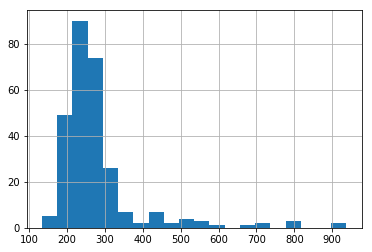

In [7]:
# some EDA
headline.AHT.hist(bins=20)

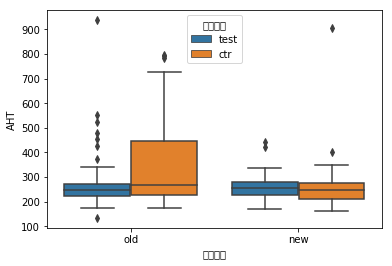

In [8]:
# some EDA
ax = sns.boxplot(x='新老客服',y='AHT',hue='实验对照',data=headline)

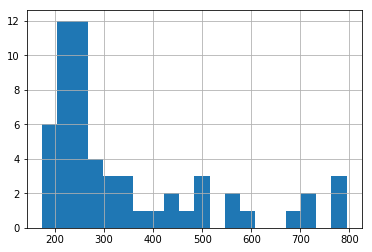

In [9]:
ax = headline.query("实验对照=='ctr' & 新老客服 == 'old'").AHT.hist(bins=20)

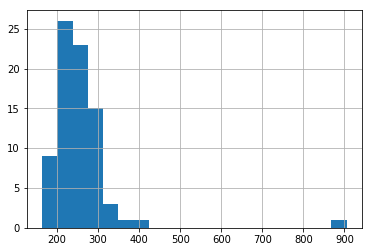

In [10]:
ax = headline.query("实验对照=='ctr' & 新老客服 == 'new'").AHT.hist(bins=20)

In [11]:
summary = data.query("实验=='工单摘要实验'")

In [12]:
summary['实验对照'] = summary['实验对照'].map({'实验组':'test','对照组':'ctr'})
summary['新老客服'] = summary['新老客服'].map({'老客服':'old','新客服':'new'})

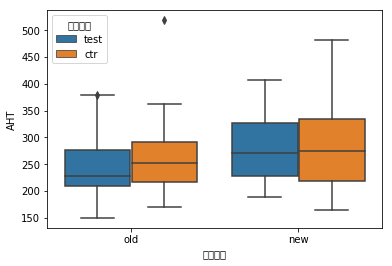

In [13]:
ax = sns.boxplot(x='新老客服',y='AHT',hue='实验对照',data=summary)

In [14]:
headline1 = data.query("实验=='第一次标题实验'")

In [15]:
headline1['实验对照'] = headline1['实验对照'].map({'实验组':'test','对照组':'ctr'})
headline1['新老客服'] = headline1['新老客服'].map({'老客服':'old','新客服':'new'})

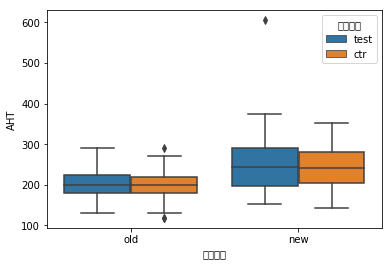

In [16]:
ax = sns.boxplot(x='新老客服',y='AHT',hue='实验对照',data=headline1)

In [17]:
stats = summary.pivot_table(index=['新老客服','实验对照'],values=['姓名','AHT'],aggfunc={'姓名':'count','AHT':'mean'})
stats

AHT  姓名
新老客服 实验对照                
new  ctr   281.250868  38
     test  274.592679  32
old  ctr   261.479571  30
     test  246.829082  35

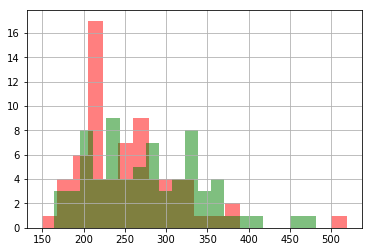

In [18]:
ax = summary.query("新老客服 == 'old'").AHT.hist(bins=20,color='red',alpha=0.5)
ax = summary.query("新老客服 == 'new'").AHT.hist(bins=20,color='green',alpha=0.5)

In [19]:
test_old = summary.query("实验对照 == 'test' & 新老客服 == 'old'").AHT
ctr_old = summary.query("实验对照 == 'ctr' & 新老客服 == 'old'").AHT
diff_old = ctr_old.mean() - test_old.mean()
diff_old

14.650488380952368

In [20]:
def perm_func(df,n1,n2):
    n = n1+n2
    idx_b = random.sample(range(n),n1)
    idx_a = list(set(range(n)) - set(idx_b))
    mean_diff = df.ix[idx_b]['AHT'].mean() - df.ix[idx_a]['AHT'].mean()
    return mean_diff

In [21]:
def perm_distribution(df,n1,n2):
    temp = {'id':[], 'value':[]}
    for i in range(1000):
        cal = perm_func(df,n1,n2)
        temp['id'].append(i)
        temp['value'].append(cal)
    
    df = pd.DataFrame.from_dict(temp)
    return df

In [22]:
df_old = summary.query("新老客服 == 'old'")
df_old = df_old.reset_index(drop=True)
n1 = len(ctr_old)
n2 = len(test_old)

In [23]:
dist_old = perm_distribution(df_old,n1,n2) 

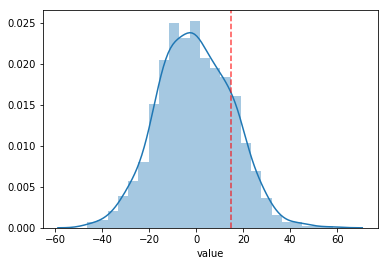

In [24]:
ax = sns.distplot(dist_old['value'])
ax = plt.axvline(x=diff_old,c='red',alpha=0.7,linestyle='--')

In [25]:
big = len(dist_old[dist_old['value']>14.7])

In [26]:
p = big/1000
p

0.175

In [27]:
big

175

In [28]:
n1

30

In [29]:
n2

35

In [30]:
test_old.mean()

246.82908228571426

In [31]:
ctr_old.mean()

261.47957066666663

In [32]:
test_old.std()

54.872794292594534

In [33]:
ctr_old.std()

68.07724764751593

In [35]:
headline.to_csv('headline.csv')